# 13. Pixel classification

We have for the moment mostly seen methods that rely on pixel intensity and shapes of objects to segment features. When dealing with natural images (typical RGB images) one can however also exploit the fact that the channels taken together give information on the image structure. To illustrate this we are going to use a classical clustering method (Kmeans) found in the package scikit-learn. That package is the reference for anyone who wants to apply machine learning methods to their data. It is a nice pendant to scikit-image as it also has a simple syntax, a good documentation and many examples.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster
import skimage.io

We are going to deal again with a geography satellite image that can be loaded here:

In [2]:
image = skimage.io.imread('../Data/geography/naip/m_3910505_nw_13_1_20150919/crop/m_3910505_nw_13_1_20150919_crop.tif')


/Users/gw18g940/miniconda3/envs/teaching_test/lib/python3.6/site-packages/skimage/external/tifffile/tifffile.py:2611: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)
/Users/gw18g940/miniconda3/envs/teaching_test/lib/python3.6/site-packages/skimage/external/tifffile/tifffile.py:2546: UserWarning: unpack: string size must be a multiple of element size
  warnings.warn("unpack: %s" % e)


Let's just keep the first three RGB channels (no clue what the fourth one is...)

In [3]:
image = image[:,:,0:3]

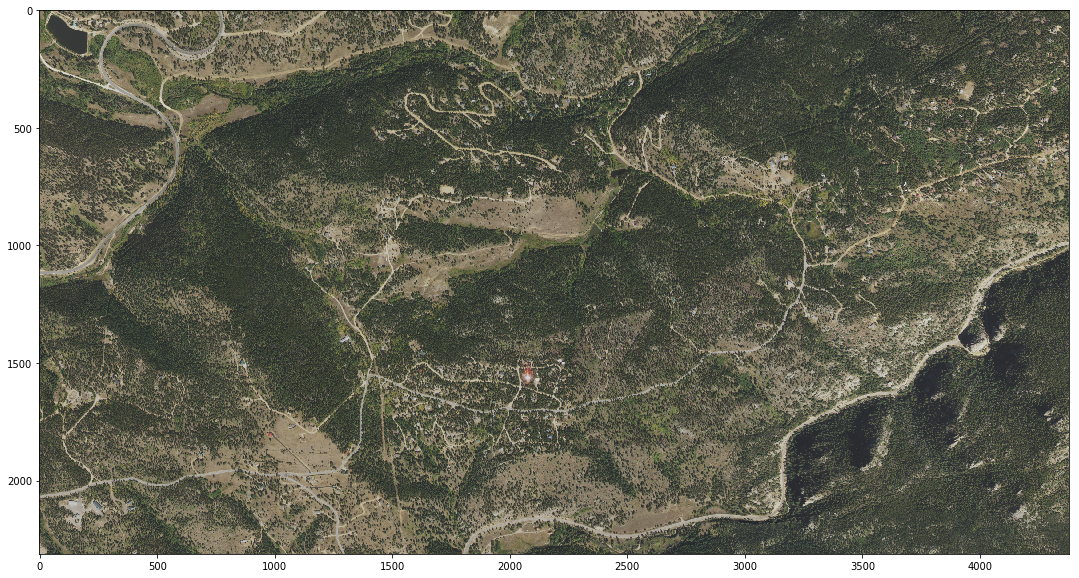

In [4]:
plt.figure(figsize=(20,10))
plt.imshow(image)
plt.show()

The image is quite large, so let's focus on a smaller region first, to reduce computational time:

In [5]:
subim = image[0:1000,0:1000,:]

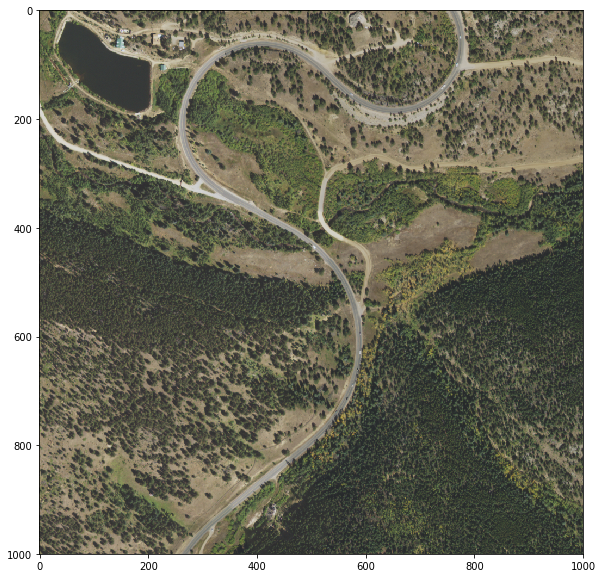

In [6]:
plt.figure(figsize=(20,10))
plt.imshow(subim)
plt.show()

If we want to use a clustering approach, *i.e*. grouping pixels which have similar features, we have to reshape our image into an actual dataset where each pixel is a datapoint with three "properties", in this case RGB.

In [7]:
X = np.reshape(subim,(subim.shape[0]*subim.shape[1],3))

We can have a look at how this dataset looks like. Let's plot the first and second "features". We reduce the number of data points and make them transparent so that we don't saturate the plot:

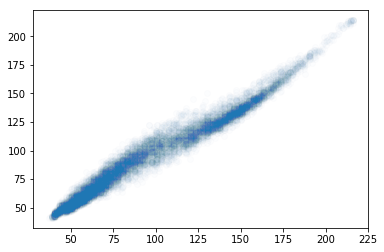

In [8]:
plt.plot(X[::100,0],X[::100,1],'o',alpha = 0.01)
plt.show()

We see by eye that we have at least two categories, with two levels of Red/Green. Let's do some clustering just on these two components to better understand what happens for the image.

We are going to feed the Kmeans algorithm with a dataset containing the Red and Green features and say that we want two categories in the end. The algorithm is going to iteratively assign each pixel to one category, and is certain to converge. Of course there are other clustering methods that you can use in sklearn.

In [9]:
kmeans = sklearn.cluster.KMeans(n_clusters=2, random_state=0).fit(X[:,0:2])

The labels of each element are stored in here:

In [10]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

Let's plot them by selecting them by label:

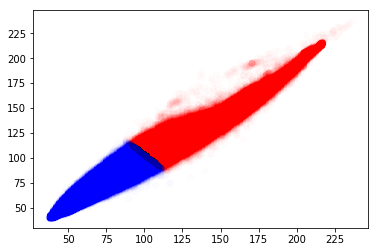

In [11]:
plt.plot(X[kmeans.labels_ == 0,0],X[kmeans.labels_ == 0,1],'ro',alpha = 0.01)
plt.plot(X[kmeans.labels_ == 1,0],X[kmeans.labels_ == 1,1],'bo',alpha = 0.01)
plt.show()

We see thats the algorith split the sample more or less at the expected position. Let's use now all the components and classify our pixels

In [12]:
kmeans = sklearn.cluster.KMeans(n_clusters=2, random_state=0).fit(X)

In [13]:
labels_im = np.reshape(kmeans.labels_,(1000,1000))

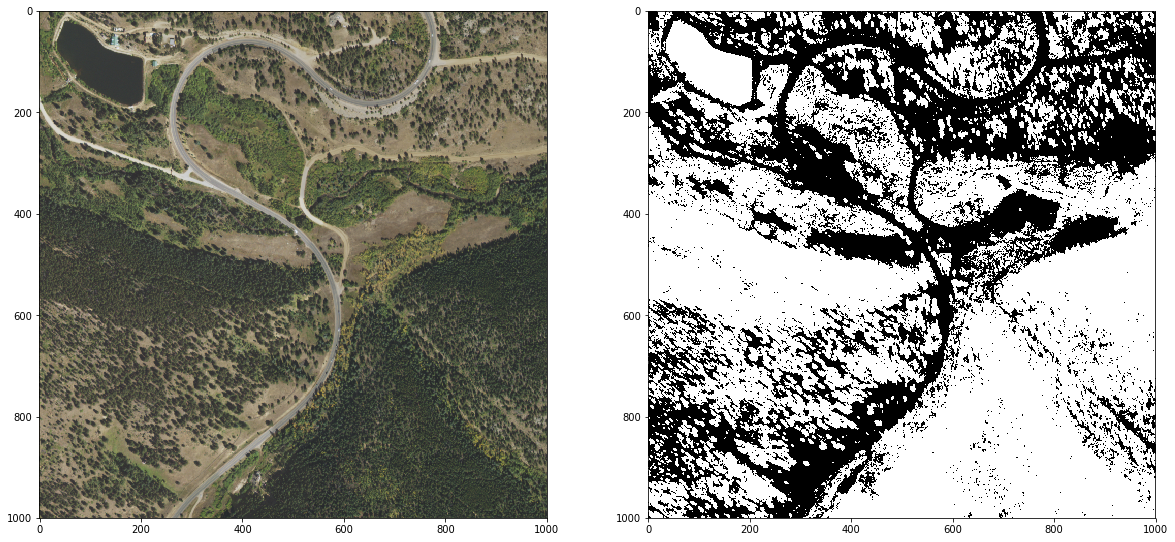

In [14]:
fig,ax = plt.subplots(1,2, figsize = (20,10))
ax[0].imshow(subim)
ax[1].imshow(labels_im,cmap = 'gray')
plt.show()

We see that we managed to plsit really well the data into forest and other types (roads, earth). Of course we couls use more categories. Maybe with four categories we could split roads, light forest, dark forest and earth. Let's do that and superpose each category to the original image.

In [15]:
kmeans = sklearn.cluster.KMeans(n_clusters=4, random_state=0).fit(X)

In [16]:
labels_im = np.reshape(kmeans.labels_,(1000,1000))

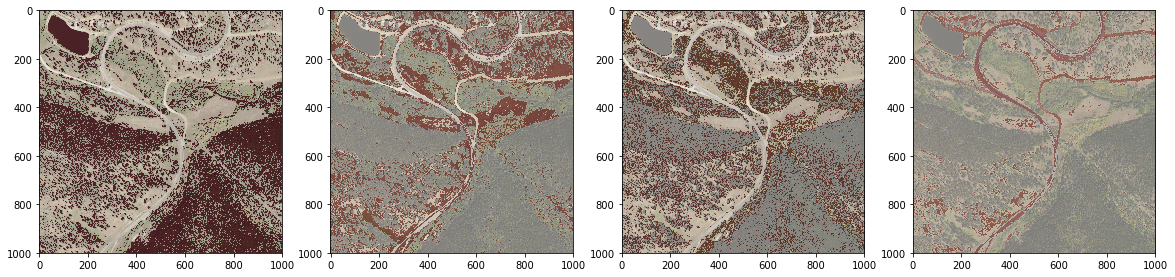

In [17]:
fig,ax = plt.subplots(1,4, figsize = (20,10))
for i in range(4):
    ax[i].imshow(subim)
    ax[i].imshow(labels_im==i,cmap = 'Reds', alpha = 0.4)
plt.show()

Of course this is a very crude approach, but we still managed to nicely recover different features on that image in only a few lines. The dataset for the entire image is huge and Kmeans clustering would be very time consuming. However we can just re-use the model we trained on the smaller image to classify all the pixels of the image:

In [18]:
X_large = np.reshape(image,(image.shape[0]*image.shape[1],3))

In [19]:
labels_large = kmeans.predict(X_large)

In [20]:
labels_im = np.reshape(labels_large,(image.shape[0],image.shape[1]))

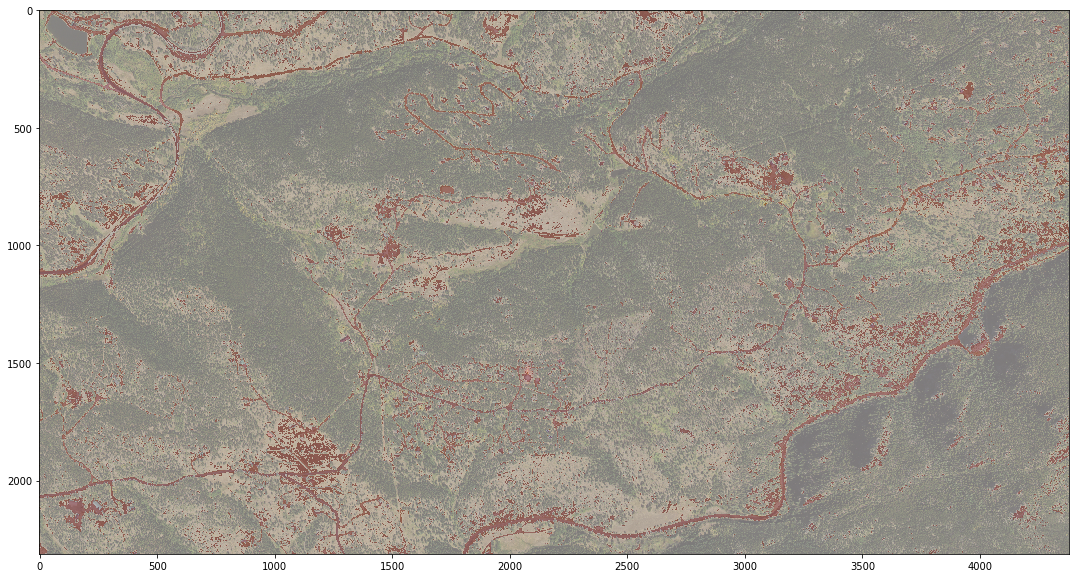

In [21]:
plt.figure(figsize=(20,10))
plt.imshow(image)
plt.imshow(labels_im==3,cmap = 'Reds', alpha = 0.4)
plt.show()